1. Import data from excel

In [71]:
%reset -f
import pandas as pd
import xlwings as xw

# Import currently selected data form excel
wb = xw.books.active
ws = wb.sheets.active
data = ws.range(wb.selection.address).value

# Make df from imported data
df = pd.DataFrame(data[2:], columns=data[0])  # Start reading data starting at row_idx=2 and use row_idx=1 as df headers
column_names = [df.columns[i] for i in [0, 2, 5]]
df = df[column_names]
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

## Visualise / check imported data
df







,Span,Scaled Count,Damage
0,0.0,0.000000e+00,NaN
1,156.3,2.295738e+06,14.409394
2,312.5,4.553796e+05,22.843893
3,468.8,2.086058e+05,35.329358
4,625.0,1.390055e+05,55.785130
...,...,...,...
60,9375.0,0.000000e+00,0.000000
61,9531.0,0.000000e+00,0.000000
62,9688.0,0.000000e+00,0.000000
63,9844.0,5.856972e+02,918.405501


2. Plot measured loads, equivalent and design

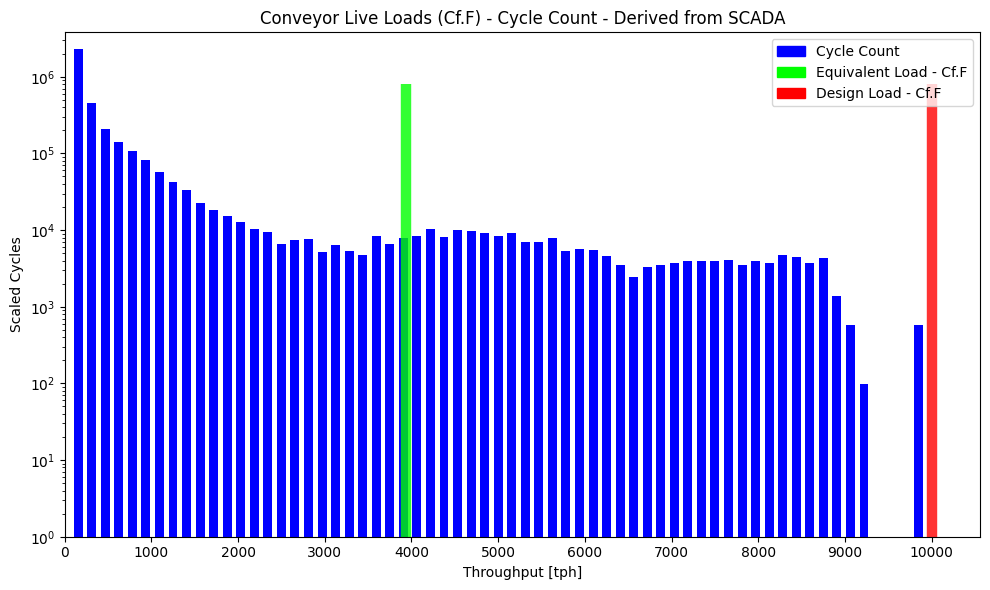

In [72]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np


# MAIN USER INPUTS
title = "Conveyor Live Loads (Cf.F) - Cycle Count - Derived from SCADA"
equivalent_load = 3937     #tph assumed 
design_load = 10000           #tph assumed 
design_cylces = 800000 

# SECONDARY USER INPUTS (plot manipulation stuff mostly, adjust as needed)
tick_spacing = max(df['Span'].max(), equivalent_load, design_load)/10
histogram_bars_width = df.iloc[-1, 0]/(len(df)-1)*0.66
plot_vertical_lines = True              # vertical lines refers to additional lines for equivalent and design loads 
vertical_line_width = 7.5
height_vertical_lines = design_cylces

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(df['Span'], df['Scaled Count'], width=histogram_bars_width, color='#0000ff')

# Set title and axis
plt.title(f'{title}')
plt.xlabel('Throughput [tph]')
plt.xlim(left=0)
# plt.xlim(right=500) #Temporary overwrite
plt.ylabel('Scaled Cycles')
plt.yscale('log')
plt.ylim(bottom=1)

# Generate x-axis ticks
x_min, x_max = 0, max(df['Span'].max(), equivalent_load, design_load)
# x_min, x_max = 0, 500 #Temporary overwrite
tick_positions = np.arange(0, x_max*1.1, tick_spacing)  
plt.xticks(tick_positions)

# Add vertical lines
_, y_max = plt.ylim()
if plot_vertical_lines:
    plt.vlines(x=equivalent_load, ymin=1, ymax=min(height_vertical_lines, y_max), 
           color='#00ff00', linestyle='-', linewidth=vertical_line_width, alpha=0.8)
    plt.vlines(x=design_load, ymin=1, ymax=min(height_vertical_lines, y_max), 
           color='#ff0000', linestyle='-', linewidth=vertical_line_width, alpha=0.8)
    
# Create legen
blue_patch = mpatches.Patch(color='#0000ff', label='Cycle Count')
red_patch = mpatches.Patch(color='#00ff00', label=f'Equivalent Load - Cf.F')
green_patch = mpatches.Patch(color='#ff0000', label=f'Design Load - Cf.F')

# Add legend and show plot
plt.legend(handles=[blue_patch, red_patch, green_patch])
plt.tight_layout()
plt.show()


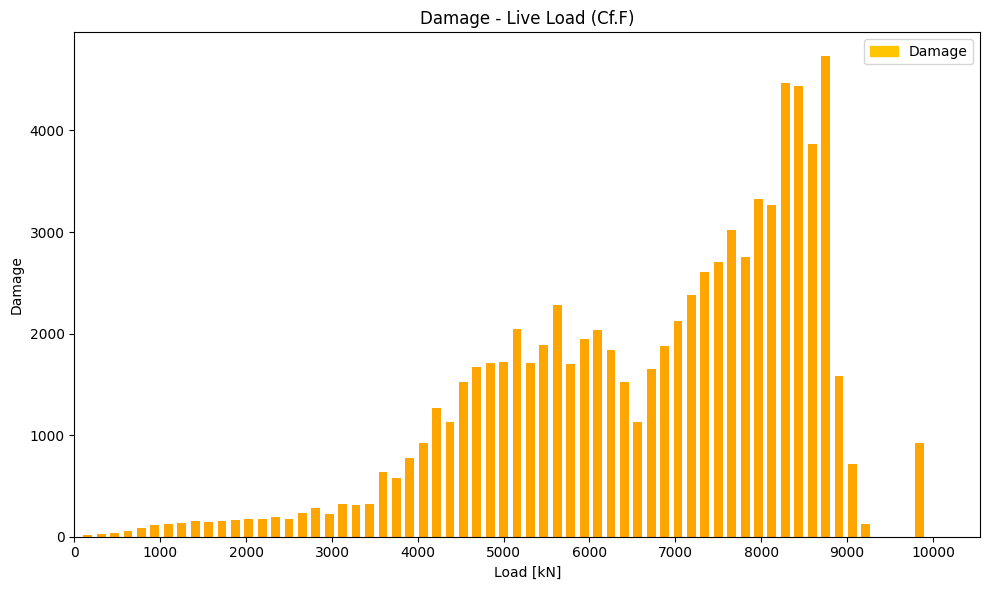

In [73]:
# MAIN USER INPUTS
title = "Damage - Live Load (Cf.F)"

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(df['Span'], df['Damage'], width=histogram_bars_width, color='#ffa500')

# Set title and axis
plt.title(f'{title}')
plt.xlabel('Load [kN]')
plt.xlim(left=0)
# plt.xlim(right=500) #Temporary overwrite
plt.ylabel('Damage')
plt.ylim(bottom=0)

# Generate x-axis ticks
x_min, x_max = 0, df['Span'].max()*1.1
# x_min, x_max = 0, 500 #Temporary overwrite
tick_positions = np.arange(0, x_max, tick_spacing)  
plt.xticks(tick_positions)
    
# Create legend
orange_patch = mpatches.Patch(color='#ffc500', label='Damage')


# Add legend and show plot
plt.legend(handles=[orange_patch])
plt.tight_layout()
plt.show()